In [75]:
import requests
import bs4
import pandas as pd

In [74]:
# Get component table
wikiURL = "https://en.wikipedia.org/wiki/Russell_1000_Index"
wikiPage = bs4.BeautifulSoup(requests.get(wikiURL).text, "html.parser")
compTable = wikiPage.find_all("table", {'class': "wikitable"})[2]
compTable = pd.read_html(str(compTable))[0]
compTable.set_index("Ticker", inplace = True)
compTable.to_csv("Russell1000_Tickers")

In [255]:
tickerdf = pd.read_csv("Russell1000_Tickers.csv")
revenuedf = pd.read_csv("Russell1000_Data.csv")[["datacqtr", "tic", "revtq", "mkvaltq"]].drop("mkvaltq", axis = 1).dropna()
revenuedf["datacqtr"] = pd.to_datetime(revenuedf["datacqtr"])
tickerdfnew = tickerdf[tickerdf.tic.isin(revenuedf.tic)]

<AxesSubplot:ylabel='tic'>

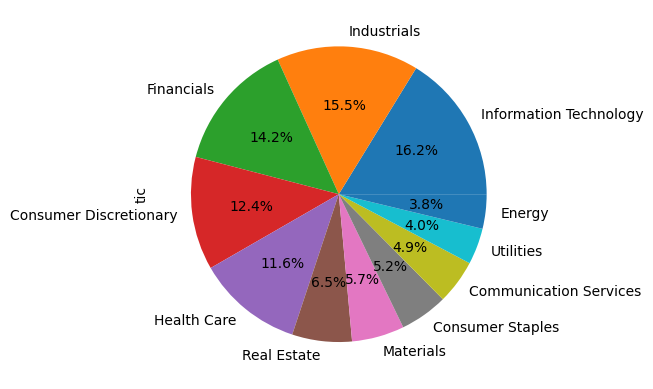

In [208]:
tickerdf.groupby("gicssector")["tic"].count().sort_values(ascending = False).plot(kind = "pie", autopct = "%.1f%%")

<AxesSubplot:ylabel='tic'>

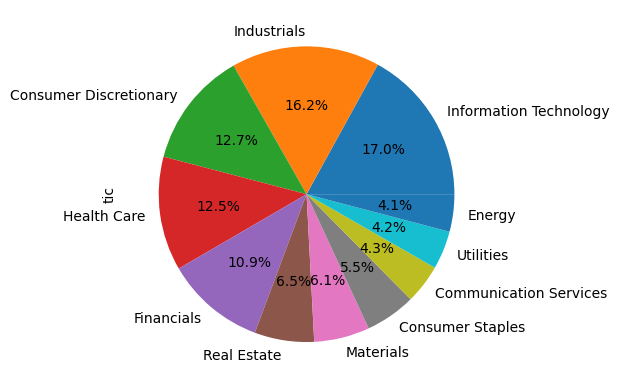

In [209]:
tickerdfnew.groupby("gicssector")["tic"].count().sort_values(ascending = False).plot(kind = "pie", autopct = "%.1f%%")

In [263]:
industryrevdf = pd.merge(revenuedf, tickerdfnew[["tic", "gicssector"]], how = "left", on = "tic", validate = "many_to_one")
# sectormarketcap = industryrevdf.groupby(["datadate", "gicssector"])[["mkvaltq"]].sum().rename(columns = {"mkvaltq" : "sectormkval"}).reset_index()
# industryrevdf = pd.merge(industryrevdf, sectormarketcap, how = "left", on = ["datadate", "gicssector"], validate = "many_to_one")
# ndustryrevdf["capweightedrev"] = industryrevdf["revtq"]*industryrevdf["mkvaltq"]/industryrevdf["sectormkval"]
industryrevdf = industryrevdf.groupby(["datacqtr", "gicssector"])[["revtq"]].sum().reset_index()
industryrevdf = industryrevdf.pivot(index = "datacqtr", columns = "gicssector", values = "revtq")
industryrevdf.to_csv("IndustryRevenues.csv")

<AxesSubplot:xlabel='datacqtr'>

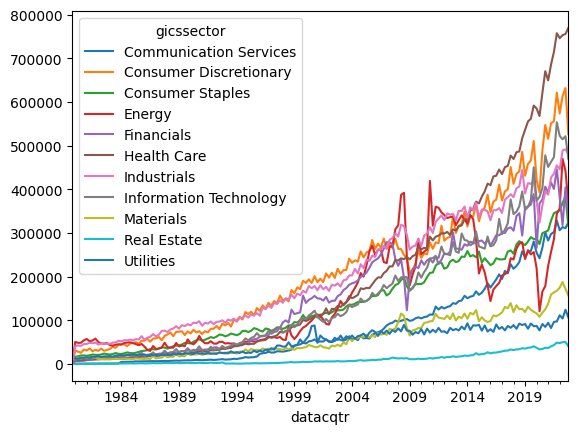

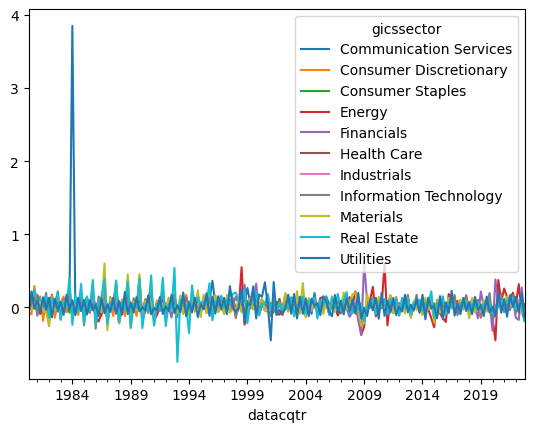

In [275]:
industryrevdf.plot()
industryrevdf.pct_change().iloc[2:].plot()